In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')
df = df.drop('id', axis=1)
target = df['target'].as_matrix()

df_test = pd.read_csv('data/test.csv')
df_test = df_test

In [3]:
df.shape

(595212, 58)

In [6]:
df.head(10)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
5,0,5,1,4,0,0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
6,0,2,1,3,1,0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
7,0,5,1,4,0,0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
8,0,5,1,3,1,0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1
9,1,1,1,2,0,0,0,1,0,0,...,3,5,0,6,0,1,0,0,1,0


In [7]:
#Load preprocessed train & test data
file = open('data/Preprocessing/train.pickle','rb')
train = pickle.load(file)
file.close()

file = open('data/Preprocessing/test.pickle','rb')
test = pickle.load(file)
file.close()

In [8]:
train[1]

array([ 0.65709588, -0.09692766, -0.40939659, -1.09296641, -0.86579976,
        0.31914093, -0.84282019, -0.52143981, -1.21853419, -0.5218435 ,
       -0.45386836,  0.95436209, -0.09762076, -1.2125985 ,  0.78546597,
       -0.33304232, -0.78056715,  0.98219591,  1.40974797, -0.83984995,
       -1.07384887, -0.49355939, -1.0465148 , -0.36735853, -1.10466907,
        0.53191121, -1.33359424,  1.48047311, -2.08037673,  0.48136447,
       -1.11557957,  1.31594414,  0.31127389,  0.44570196, -1.05732445,
       -0.66202185, -0.76327648, -0.43861111,  0.44323087,  1.57601059,
        1.28702118, -0.83353028, -0.40711306,  0.38459494,  1.12703744,
       -1.01288793, -2.74306524, -1.20039924, -0.63608443, -0.47414534,
       -0.53164993,  0.66025654, -1.62167153, -0.78436705,  0.46654456,
       -0.40482082, -0.54598599, -0.20359732])

In [265]:
print("Train: "+str(train.shape))
print("Test: "+str(test.shape))
print("===Training Set===\n"+str(df['target'].value_counts()))
print("0 (%): " +str((df['target'].value_counts()[0])/train.shape[0]*100))
print("1 (%): " +str((df['target'].value_counts()[1])/train.shape[0]*100))

Train: (595212, 58)
Test: (892816, 58)
===Training Set===
0    573518
1     21694
Name: target, dtype: int64
0 (%): 96.3552482141
1 (%): 3.64475178592


In [320]:
np.random.seed(70)
rand_idx = np.random.choice(len(train),int(0.05*len(train)))
x_val = train[rand_idx]
y_val = target[rand_idx]
x_train = np.delete(train,rand_idx,0)
y_train = np.delete(target,rand_idx,0)
x_test = test

In [321]:
print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print("==================================")
print("> Train")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
print("0 (%): "+str(counts[0]/y_train.shape[0]*100))
print("1 (%): "+str(counts[1]/y_train.shape[0]*100))
print("> Validate")
unique, counts = np.unique(y_val, return_counts=True)
print(dict(zip(unique, counts)))
print("0 (%): "+str(counts[0]/y_val.shape[0]*100))
print("1 (%): "+str(counts[1]/y_val.shape[0]*100))

Train data shape:  (566176, 58)
Train labels shape:  (566176,)
Validation data shape:  (29760, 58)
Validation labels shape:  (29760,)
Test data shape:  (892816, 58)
> Train
{0: 545540, 1: 20636}
0 (%): 96.3551969706
1 (%): 3.64480302945
> Validate
{0: 28670, 1: 1090}
0 (%): 96.3373655914
1 (%): 3.6626344086


In [322]:
## Pre-defined Function
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Modeling

In [323]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K
import tensorflow as tf
from sklearn.utils import class_weight

In [324]:
def get_feedforward_nn():
    input1 = Input(shape=(58,))
    x = Dense(30, activation='relu')(input1)
#     x = Dropout(0.2)(x)
#     x = Dense(70, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = Dense(30, activation='relu')(x)
    out = Dense(1,activation='sigmoid')(x)
    model = Model(inputs=input1, outputs=out)
    model.compile(optimizer=Adam(lr=0.003,decay=0.004),
                loss='binary_crossentropy',
                metrics=['acc'])
    return model

In [325]:
# Path to save model parameters
weight_path_feedforward_nn='model/model_weight_feedforward_nn.h5'

# Training callbacks list
callbacks_list_feedforward_nn = [
        ModelCheckpoint(
            weight_path_feedforward_nn,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]

In [326]:
#compute class weight
class_w = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# weight = {
#     0:class_w[0],
#     1:class_w[1]
# }
weight = {
    0:100/2/92,
    1:100/2/8
}
weight

{0: 0.5434782608695652, 1: 6.25}

In [327]:
print('Compile Model')
verbose = 1
model_feedforward_nn = get_feedforward_nn()
time = 0

Compile Model


In [342]:
#Training
train_params = [(30, 8192)]
print("Start Time = "+str(time))
for (epochs, batch_size) in train_params:
    time = time+1
    print("train with {} epochs and {} batch size".format(epochs, batch_size))
    model_info = model_feedforward_nn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose,
                           callbacks=callbacks_list_feedforward_nn,class_weight=weight,
                           validation_data=(x_val, y_val))

Start Time = 1
train with 30 epochs and 8192 batch size
Train on 566176 samples, validate on 29760 samples
Epoch 1/30
566176/566176 [==============================] - 1s - loss: 0.4383 - acc: 0.9319 - val_loss: 0.3820 - val_acc: 0.9272
Epoch 2/30
566176/566176 [==============================] - 1s - loss: 0.4383 - acc: 0.9325 - val_loss: 0.3792 - val_acc: 0.9274
Epoch 3/30
566176/566176 [==============================] - 1s - loss: 0.4382 - acc: 0.9330 - val_loss: 0.3848 - val_acc: 0.9232
Epoch 4/30
566176/566176 [==============================] - 1s - loss: 0.4381 - acc: 0.9300 - val_loss: 0.3783 - val_acc: 0.9292
Epoch 5/30
566176/566176 [==============================] - 1s - loss: 0.4380 - acc: 0.9332 - val_loss: 0.3811 - val_acc: 0.9263
Epoch 6/30
566176/566176 [==============================] - 1s - loss: 0.4380 - acc: 0.9312 - val_loss: 0.3817 - val_acc: 0.9263
Epoch 7/30
566176/566176 [==============================] - 1s - loss: 0.4379 - acc: 0.9313 - val_loss: 0.3777 - val_ac

KeyboardInterrupt: 

In [329]:
from IPython.display import Audio
sound_file = './sound/JAZZ1.WAV'
Audio(url=sound_file, autoplay=True)

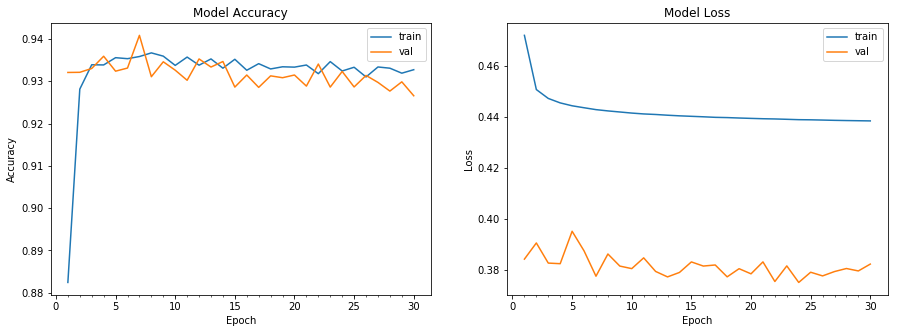

In [330]:
plot_model_history(model_info)

## Evaluation

In [331]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [343]:
pred = model_feedforward_nn.predict(x_val)
#map probability to class
prob_to_class = lambda p: 1 if p[0]>=0.5 else 0
prob_trans = lambda p:p[0]
y_prob = np.apply_along_axis(prob_trans,1,pred)
y_pred = np.apply_along_axis(prob_to_class,1,pred)

In [344]:
print(np.sum(y_pred[np.equal(y_pred,y_val)]))
print(y_val.shape[0])
print(np.sum(y_pred))

94
29760
1213


In [345]:
actual = y_val
predictions = y_prob
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.246


## Prediction

In [346]:
pred_test = model_feedforward_nn.predict(x_test)
#map probability to class
prob_to_class = lambda p: 1 if p[0]>=0.5 else 0
prob_trans = lambda p:p[0]
y_pred_test = np.apply_along_axis(prob_to_class,1,pred_test)
y_prob_test = np.apply_along_axis(prob_trans,1,pred_test)

In [347]:
y_prob_test = np.apply_along_axis(prob_trans,1,pred_test)

In [337]:
y_pred_test.shape

(892816,)

In [338]:
print(np.sum(y_pred_test))

37056


In [348]:
result = pd.DataFrame({'id':df_test['id'],'target': y_prob_test})

In [340]:
y_prob_test

array([ 0.26668322,  0.28009123,  0.22029935, ...,  0.23939545,
        0.15864408,  0.27612022], dtype=float32)

In [349]:
result.to_csv('data/result_24-6.csv', index=False)